## ML&AI Tutorial 3
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Batch: C<br>
Q.1: Construct a classifier for the MNIST data set . Try to get more than 96% accuracy on your test set.

In [1]:
#importing important libraries
import keras
import pandas as pd
import numpy as np
import time
import scipy as sp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [2]:
#Confirming backend framework of keras
keras.backend.backend()

'tensorflow'

In [3]:
#importing the datset and splitting into relavant parts
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train) = data[0]
(X_test, y_test) = data[1]

Actual label :  2


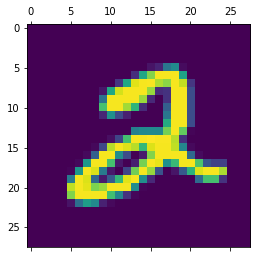

In [4]:
#Plotting of the data to yield a picture and its respective type
plt.matshow(X_train[5])
print("Actual label : ",y_train[5])

In [5]:
#normalize the dataset
X_train = X_train/255
X_test = X_test/255

In [6]:
#Building the neural network
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(20, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

In [7]:
#Compiling the model and summary 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Train the model
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.3866 - accuracy: 0.8925
Epoch 2/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.2170 - accuracy: 0.9389
Epoch 3/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.1844 - accuracy: 0.9471
Epoch 4/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.1628 - accuracy: 0.9535
Epoch 5/10
1875/1875 [==============================] - 1s 596us/step - loss: 0.1479 - accuracy: 0.9579
Epoch 6/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.1371 - accuracy: 0.9605
Epoch 7/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.1279 - accuracy: 0.9633
Epoch 8/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.1208 - accuracy: 0.9653
Epoch 9/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.1146 - accuracy: 0.9665
Epoch 10/10
1875/1875 [==============================] - 1s 599u

In [9]:
#evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 595us/step - loss: 0.1339 - accuracy: 0.9624


[0.1339450478553772, 0.9624000191688538]

#### Thus, we can see from the above evaluation that the model is 96.24% accurate based on the test dataset. 
#### Q. 2: Write a method to shift an image from the MNIST (right or left) by 2 pixels. 

In [10]:
from sklearn.datasets import fetch_openml
from scipy.ndimage.interpolation import shift
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to shift the image by the given number of pixels
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [11]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

# Shifting image by 2 pixels
for dx, dy in ((2,0), (-2,0), (0,2), (0,-2)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)

Text(0.5, 1.0, 'Shifted Image')

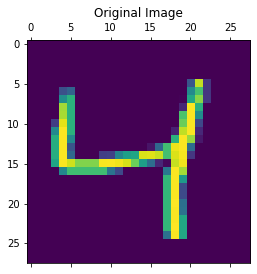

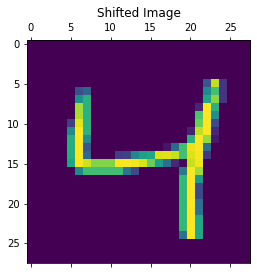

In [12]:
idx = len(X_train) + 2
X_train_augmented[idx] = X_train_augmented[idx].reshape(28,28)
plt.matshow(X_train[2])
plt.title('Original Image')

plt.matshow(X_train_augmented[idx])
plt.title('Shifted Image')

#### Thus, from the above we can see that the images are shifted by 2 pixels to the right.
#### Q. 3: Develop your own anti-spam program or classifier. 

In [13]:
# Reading spam data
data = pd.read_csv('spam.csv',encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
# Deleting unwanted columns
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Replacing data target values
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
y = data['v1']
X_text = data['v2']
print(X_text.shape)
print(y.shape)

(5572,)
(5572,)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
cv = CountVectorizer(stop_words =sw)
tcv = cv.fit_transform(X_text).toarray()
print(len(tcv[0,:]))

8536


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(tcv.shape)
print(y.shape)

(5572, 8536)
(5572,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
X = vectorizer.fit_transform(X_text).toarray()
print(X.shape)
print(y.shape)

(5572, 8536)
(5572,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.202, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
y_test.shape

(4446, 8536)
(4446,)
(1126, 8536)


(1126,)

In [21]:
# Training logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)
txt = "Hey there! I would like to sell you this product."
print(clf.predict(vectorizer.transform([txt])))

[0]


C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)
txt = "Hey there! I would like to sell you this product."
print(clf.predict(vectorizer.transform([txt]).toarray()))

[0]


In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9715808170515098

In [24]:
txt = "Free entry in 2 a wkly comp to win FA Cup"
print(clf.predict(vectorizer.transform([txt]).toarray()))

[0]


#### Thus, from the above models, Gaussian Classifier is the best with a high accuracy score of 97.15%